In [1]:
from typing import Dict, NamedTuple, List, Union, Optional

import numpy as np
import pandas as pd
import torch
import yaml

from torch.utils.data import Dataset
from torch.utils.data import SubsetRandomSampler, DataLoader
from torchvision import transforms

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
sns.set()

from wheel5.dataset import LMDBImageDataset, TransformDataset, AlbumentationsDataset
from wheel5.transforms import SquarePaddedResize
from wheel5.visualization import visualize_samples

from albumentations import Compose, HorizontalFlip

In [2]:
with open('../config.yaml', 'r') as config_file:
    config = yaml.load(config_file, Loader=yaml.Loader)

In [3]:
def load_image_dataset(config: Dict[str, str]) -> LMDBImageDataset:
    df_images = pd.read_csv(filepath_or_buffer=config['dataframe'], sep=',', header=0)

    lmdb_dataset = LMDBImageDataset.cached(df_images,
                                           image_dir=config['image_dir'],
                                           lmdb_path=config['lmdb_dir'],
                                           transform=SquarePaddedResize(size=224))
    
    image_dataset = AlbumentationsDataset(lmdb_dataset, 
                                          transform=Compose([
                                              VerticalFlip()
                                          ]))
    
    return image_dataset

In [4]:
datasets_config = config['datasets']

train_dataset = load_image_dataset(datasets_config['train'])
public_test_dataset = load_image_dataset(datasets_config['public_test'])
private_test_dataset = load_image_dataset(datasets_config['private_test'])

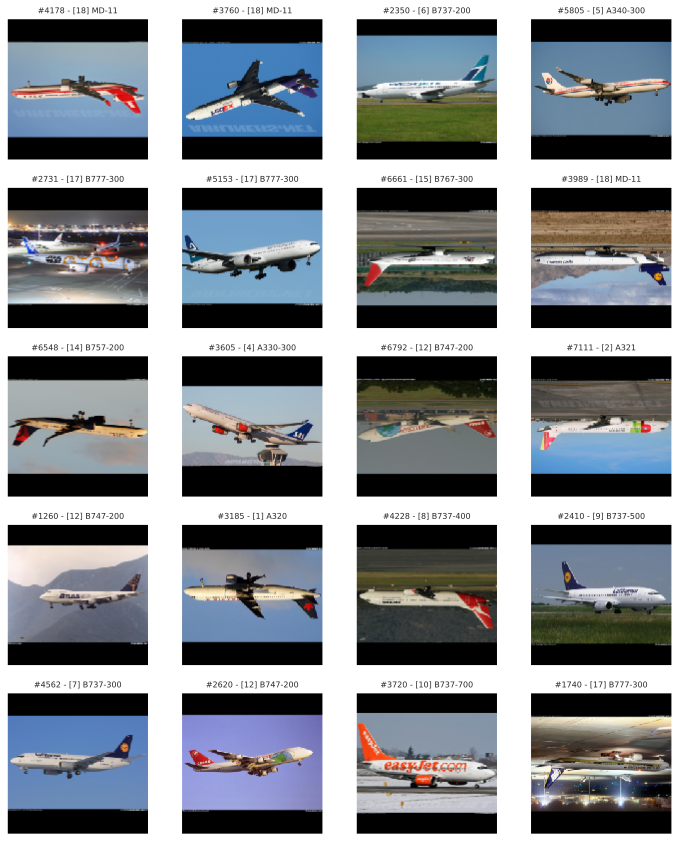

In [5]:
visualize_samples(train_dataset, cols=4, rows=5)

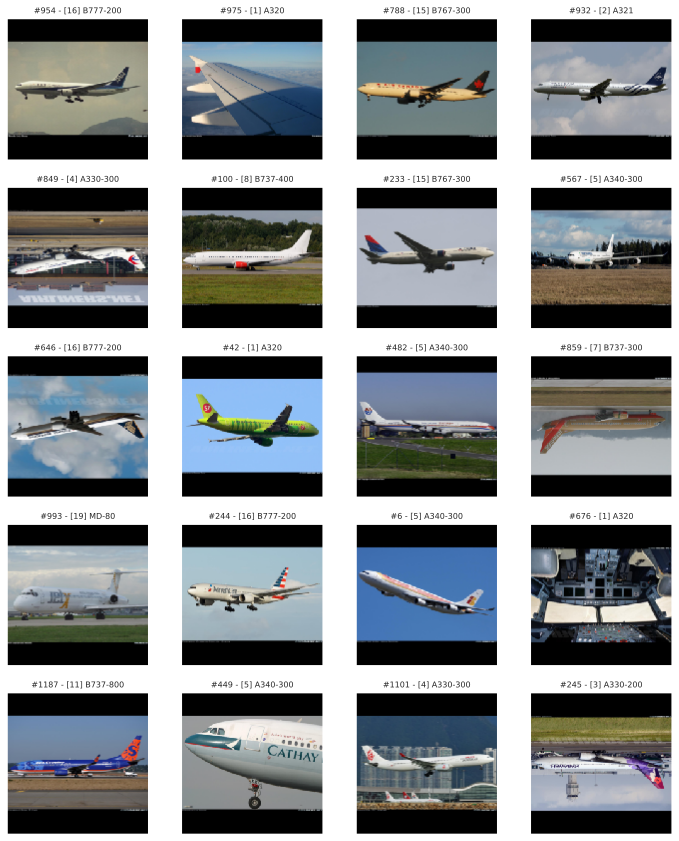

In [6]:
visualize_samples(public_test_dataset, cols=4, rows=5)

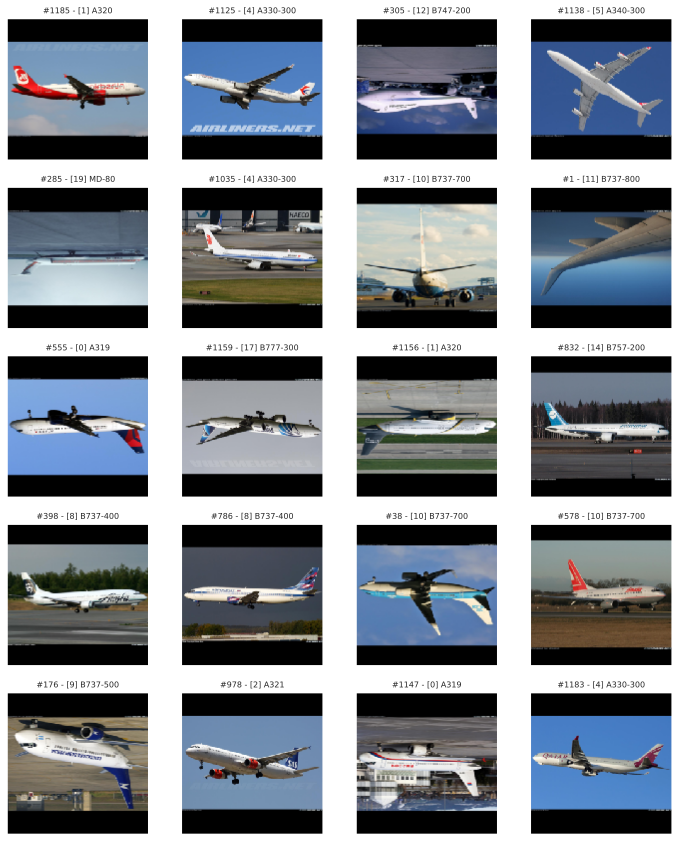

In [7]:
visualize_samples(private_test_dataset, cols=4, rows=5)